<h1> Box Covering

The code in this notebook implements two box covering algorithms for networks to identify if they have fractal properties.

**Module Imports**

In [1]:
import fractalnetworks as fn

# Network analysis modules
from igraph import Graph
import igraph
import networkx as nx

# Mathematics modules
import math
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.io import mmread
import scipy.stats
from sklearn.linear_model import LinearRegression

# Utility modules
import csv
from datetime import datetime
from operator import itemgetter
import os
import pandas as pd
import time
from tqdm import tqdm

<h2> Reading Graphs

Graphs can be read from .gml files. 

In [5]:
eduG = Graph.Load("network-files/real-world/web/web-edu_processed.gml", format="gml")
uvflowerG = Graph.Load("network-files/models/uv-flowers/3_5_flower-generation4.gml", format="gml")

`fn.read_graph` can read network files in .gml, .mtx, .txt, .edge and .EDGE formats. If the data you are using uses an unusual format (e.g. an edge file with a specific delimiter) then the file may requires some preprocessing.

In [5]:
help(fn.read_graph)

Help on function read_graph in module fractalnetworks.utilities:

read_graph(filepath)
    Checks the filetype and calls the correct function to read the graph.
    For any file not in .gml format, an additional .gml file is created.
    Supports .mtx, .txt, .edge (.EDGE) and .gml filetypes.
    
    Args:
        filepath (str) : Path for the network file.
    
    Returns:
        (igraph.Graph) : The network from the file stored as a graph.



Use `fn.summarise_graph` to display an output of the network's key features. 

In [8]:
help(fn.summarise_graph)

Help on function summarise_graph in module fractalnetworks.networkproperties:

summarise_graph(G, skip_diam=False, skip_aspl=False)
    Summarises the key attributes of a given network.
    
    Args:
        G (igraph.Graph)                  : The network to be analysed.
        skip_diam (:obj:`bool`, optional) : If True, then do not calculate the diameter of the graph.
                                                This is recommended for large graphs. The default is False.
        skip_aspl (:obj:`bool`, optional) : If True, then do not calculate the average shortest path length.
                                                This is recommended for large graphs. The default is False.



In [22]:
fn.summarise_graph(eduG)

Network has 3031 nodes and 6474 edges.
The average degree of the network is 4.27185747278126.
The average shortest path length is 4.271685489902483.
The diameter is 11.


<h2>Maximum Excluded Mass Burning (MEMB) Algorithms

The original MEMB method is applied using `fn.MEMB` with a given network and value $\ell_B$.

In [8]:
help(fn.MEMB)

Help on function MEMB in module fractalnetworks.maximumexcludedmassburning:

MEMB(G, lB, deterministic=True)
    Implements the Maximal Excluded Mass Burning (MEMB) algorithm as introduced by (Song, Gallos, et al., 2007).
    Note that this method only works for odd values of lB.
    For even lB, MEMB(lB) = MEMB(lB-1).
    
    Args:
        G (igraph.Graph)                      : The network the algorithm is to be applied to.
        lB (int)                              : The diameter of the boxes used to cover the network.
        deterministic (:obj:`bool`, optional) : Decides the tie breaking rule.
                                                If False, choose fom nodes with equal excluded mass uniformly at random.
                                                If True, choose the first lexicographically.
    
    Returns:
        (list) : A list of nodes assigned to be centres under the MEMB algorithm.



In [20]:
start = time.time()
centres = fn.MEMB(uvflowerG, 5)
end = time.time()

print("Found {} centres in {} seconds.".format(len(centres), end-start))
print(centres)

Found 440 centres in 200.59051728248596 seconds.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '59', '65', '71', '77', '83', '89', '95', '101', '107', '113', '119', '125', '131', '137', '143', '149', '155', '161', '167', '173', '179', '185', '191', '197', '203', '209', '215', '221', '227', '233', '239', '245', '251', '257', '263', '269', '275', '281', '287', '293', '299', '305', '311', '317', '323', '329', '335', '341', '347', '353', '359', '365', '371', '377', '383', '389', '395', '401', '407', '413', '419', '425', '431', '437', '56', '60', '62', '66', '68', '72', '74', '78', '80', '84', '86', '90', '92', '96', '98', '102', '104', '108', '110', '114', '116', '120', '122', '126', '128', '132', '134', '138', '1

The novel accelerated method is applied using `fn.accelerated_MEMB`.

In [21]:
help(fn.accelerated_MEMB)

Help on function accelerated_MEMB in module fractalnetworks.maximumexcludedmassburning:

accelerated_MEMB(G, lB)
    Implements the Maximal Excluded Mass Burning (MEMB) algorithm (Song, Gallos, et al., 2007), with time improvements.
    Rather than calculating the excluded mass for all nodes at each stage,
        calculate the excluded mass of the node with the next highest excluded mass in the previous stage.
    Then reject all nodes with excluded mass in the previous stage less than this value.
    Repeat until only one node is left, and this becomes the next p.
    Note that this method only works for odd values of lB.
    This method is always deterministic (ties are broken lexicographically).
    For even lB, MEMB(lB) = MEMB(lB-1).
    
    Args:
        G (igraph.Graph)                      : The network the algorithm is to be applied to.
        lB (int)                              : The diameter of the boxes used to cover the network.
    
    Returns:
        (list) : A lis

In [5]:
start = time.time()
centres = fn.accelerated_MEMB(uvflowerG, 5)
end = time.time()

print("Found {} centres in {} seconds.".format(len(centres), end-start))
print(centres)

Found 440 centres in 1.3236372470855713 seconds.
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 59, 65, 71, 77, 83, 89, 95, 101, 107, 113, 119, 125, 131, 137, 143, 149, 155, 161, 167, 173, 179, 185, 191, 197, 203, 209, 215, 221, 227, 233, 239, 245, 251, 257, 263, 269, 275, 281, 287, 293, 299, 305, 311, 317, 323, 329, 335, 341, 347, 353, 359, 365, 371, 377, 383, 389, 395, 401, 407, 413, 419, 425, 431, 437, 438, 432, 434, 426, 428, 420, 422, 414, 416, 408, 410, 402, 404, 396, 398, 390, 392, 384, 386, 378, 380, 372, 374, 366, 368, 360, 362, 354, 356, 348, 350, 342, 344, 336, 338, 330, 332, 324, 326, 318, 320, 312, 314, 306, 308, 300, 302, 294, 296, 288, 290, 282, 284, 276, 278, 270, 272, 264, 266, 258, 260, 252, 254, 246, 248, 240, 242, 234, 236, 228, 230, 222, 224, 216, 218, 210, 212, 204, 206, 198, 200, 192, 194, 186, 188

You can see that the amended degree based method of MEMB is much faster than the original method. 

<h2>Greedy Colouring Algorithm

The greedy colouring algorithm is applied with `fn.greedy_box_covering`. The order of the nodes can be specified by passing a function which calculates such an order, e.g. `fn.smallest_last`.

In [17]:
help(fn.greedy_box_covering)

Help on function greedy_box_covering in module fractalnetworks.greedyalgorithm:

greedy_box_covering(G, lB, node_order=None)
    Colours the network in boxes of diameter lB using the greedy algorithm (Song, Gallos, et al., 2007).
    
    Args:
        G (igraph.Graph)                   : The network to be analysed.
        lB (int)                           : The diameter of the boxes for the box covering.
        node_order (:obj:`list`, optional) : The order of the nodes in which the greedy colouring is applied.
                                             If None, the nodes are coloured in lexicographical order.
                                             Default is None.
    
    Returns:
        (tuple) : Tuple containing a dict and int.
                    The dict represents the greedy colouring, with the nodes as keys and the colours as values.
                    The int is the number of boxes of diameter lB needed to cover the network.



In [19]:
help(fn.smallest_last)

Help on function smallest_last in module fractalnetworks.greedyalgorithm:

smallest_last(G)
    Orders nodes using the smallest last (Matula and Beck, 1983) method.
    
    Args:
        G (igraph.Graph) : The network being ordered.
    
    Returns:
        (list) : A list of the nodes in order.



In [25]:
_, NB = fn.greedy_box_covering(uvflowerG, 5)
print("Found {} boxes.".format(NB))

Found 600 boxes.


<h2> Calculating the $\ell_B$-$N_B$ distribution. 

To find the values of $N_B$ for all $\ell_B = 1, \dots, \Delta$ where $\Delta$ is the diameter of the network use `fn.calculate_lB_NB_dist`.


In [28]:
help(fn.calculate_lB_NB_dist)

Help on function calculate_lB_NB_dist in module fractalnetworks.determiningfractality:

calculate_lB_NB_dist(G, diam=None, normalise=False, lB_min=2, save_path=None, colouring_ordering_method=None)
    Finds the distribution of the optimal number of boxes NB against the diameter of these boxes lB.
    
    Args:
        G (igraph.Graph)                                      : The network to be analysed.
        diam (:obj:`int`, optional)                           : The diameter of the network G.
                                                                If none given, the diameter is calculated.
                                                                Default is None.
        normalise (:obj:`bool`, optional)                     : If True, normalises the number of boxes over the total
                                                                    number of nodes in the network.
                                                                Default is False.
        lB

In [14]:
lB, NB = fn.calculate_lB_NB_dist(eduG)
print(NB)

 91%|██████████████████████████████████████████████████████████████████████████▌       | 10/11 [00:44<00:04,  4.49s/it]

[1581, 249, 186, 12, 7, 6, 4, 3, 3, 2, 1]


<h2> Determining Fractality </h2>

The function `fn.is_fractal` can be used to check if the results for a network stored in a given file are fractal or not, depending on whether it better follows a power law or exponential fit. If the exponential fit is better the network is assumed to be non-fractal, and the function returns False. Otherwise, it returns True.

In [10]:
help(fn.is_fractal)

Help on function is_fractal in module fractalnetworks.determiningfractality:

is_fractal(results_filepath, plot=False, verbose=False, save_path=None, p_list=None)
    Tests if a given lB-NB distribution is a power-law or exponential, thus determining if a network is fractal or not.
    
    Args:
        results_filepath (str)           : The filepath for the csv file storing the lB-NB distribution.
        plot (:obj:`bool`, optional)     : If True, a comparison of the relationship between lB and NB is plotted.
        verbose (:obj:`bool`, optional)  : If True, the results are printed.
        save_path (:obj:`str`, optional) : The figure generated is saved to the file path, if given. Default is None.
        p_list (:obj:`list`, optional)   : A list of percentages p.
                                           The fractal dimension is given by the gradient of the best fit over p% of the
                                                distribution.
                                    

 99%|███████████████████████████████████████████████████████████████████████████████▍| 133/134 [13:40<00:06,  6.17s/it]


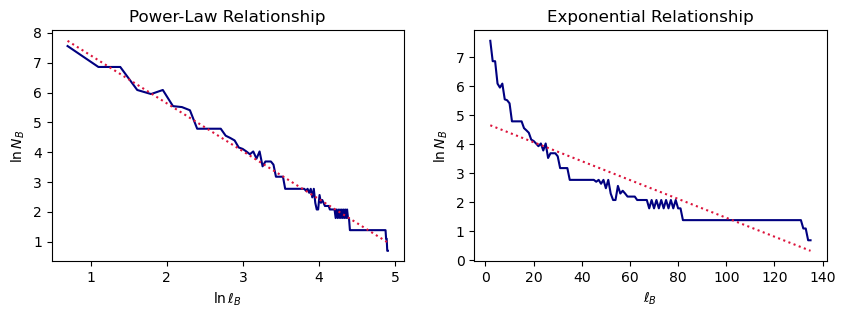

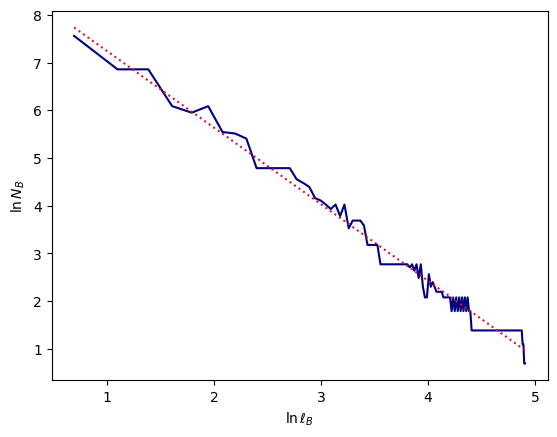

This network is fractal with box dimension 1.6056.
Power law score: 0.9815.
Exponential score: 0.7823.


True

In [17]:
fn.calculate_lB_NB_dist(uvflowerG, save_path='tutorial/results_example')
fn.is_fractal('tutorial/results_example', plot=True, verbose=True)

<h2>Finding Boxes

There are three functions which can be used to find a box covering of a given network. The method used is based on that described by the MEMB algorithm [1].

In [19]:
help(fn.find_central_distance)

Help on function find_central_distance in module fractalnetworks.boxrenormalisation:

find_central_distance(G, centres)
    Finds the central distance for each node in a network given a list of centres.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        centres (list): A list of centre nodes from the MEMB algorithm.
    
    Returns:
        central_distance (dict): A dictionary containing nodes as keys and their central distance as values.



In [21]:
help(fn.assign_nodes_to_boxes)

Help on function assign_nodes_to_boxes in module fractalnetworks.boxrenormalisation:

assign_nodes_to_boxes(G, centres, central_distance)
    Generates a dictionary assigning each node to a box under the MEMB algorithm.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        centres (list): A list of centre nodes according to the MEMB algorithm.
        central_distance (dict): A dictionary containing nodes as keys and their central distance as values.
    
    Returns:
        nodes_to_boxes (dict): A dictionary containing nodes as keys and the box they are assigned to as the value.



In [23]:
help(fn.find_boxes)

Help on function find_boxes in module fractalnetworks.boxrenormalisation:

find_boxes(nodes_to_boxes, centres)
    Finds a list of nodes assigned to each box in a network.
    
    Args:
        nodes_to_boxes (dict): A dictionary with nodes as keys and their corresponding boxes as values.
        centres (list): A list of the nodes found as centres under the MEMB algorithm.
    
    Returns:
        boxes (dict): A dictionary with boxes as keys and a list of nodes in that box as the value.



The below is an example of how to assign nodes to connected boxes. 

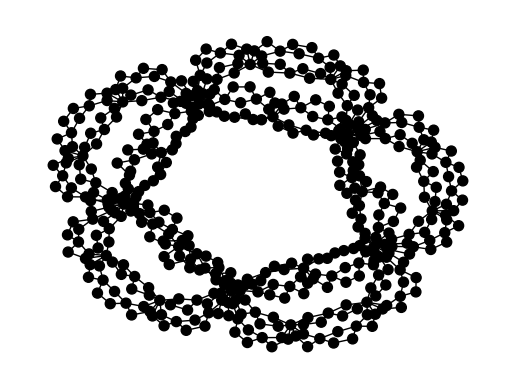

In [3]:
G = Graph.Load("tutorial/2_3_flower-generation4.gml")
fn.display_network(G)

In [4]:
# Find the centres
centres = fn.accelerated_MEMB(G, 5)

In [5]:
# Calculate the central distance for each node.
central_distance = fn.find_central_distance(G, centres)

In [6]:
# Assign each node to a box under the MEMB algorithm.
nodes_to_boxes = fn.assign_nodes_to_boxes(G, centres, central_distance)

In [7]:
# Find a list of nodes for each of the boxes. 
boxes = fn.find_boxes(nodes_to_boxes, centres)

The result `boxes` is a dictionary which is stores the ID of each box as a key and the list of nodes in that box as the values.

In [9]:
print(boxes)

{0: [0, 95, 96, 99, 101, 102, 105, 107, 108, 111, 113, 114, 116, 117, 20, 29, 97, 103, 109, 115], 1: [1, 119, 120, 122, 123, 125, 126, 128, 129, 131, 132, 134, 135, 137, 138, 141, 35, 41, 121, 127, 133, 139], 2: [2, 143, 144, 146, 147, 149, 150, 152, 153, 155, 156, 158, 159, 161, 162, 164, 165, 47, 50, 53, 145, 151, 157, 163], 3: [3, 167, 168, 171, 173, 174, 176, 177, 179, 180, 183, 185, 186, 189, 56, 59, 65, 169, 175, 181, 187], 4: [4, 191, 192, 195, 197, 198, 201, 203, 204, 206, 207, 209, 210, 212, 213, 71, 77, 193, 199, 205, 211], 5: [6, 227, 228, 230, 231, 233, 234, 236, 237, 23, 80, 229, 232, 235], 6: [9, 263, 264, 266, 267, 269, 270, 273, 265, 268, 271], 7: [12, 299, 300, 302, 303, 305, 306, 309, 301, 304, 307], 8: [15, 335, 336, 338, 339, 341, 342, 344, 345, 55, 337, 340, 343], 9: [18, 371, 372, 374, 375, 377, 378, 380, 381, 67, 92, 373, 376, 379], 10: [19, 383, 384, 386, 387, 389, 390, 392, 393, 79, 94, 385, 388, 391, 394], 11: [16, 347, 348, 350, 351, 353, 354, 356, 357, 89, 9

**Box Renormalisation**

Sometimes we want to be able to visualise the box covering method. The function `fn.draw_box_covering` displays the network using matplotlib and networkx, with each of the nodes colour coded according to the box they belong to. 

In [12]:
help(fn.draw_box_covering)

Help on function draw_box_covering in module fractalnetworks.utilities:

draw_box_covering(G, nodes_to_boxes)
    Displays the network with nodes coloured according to the box covering.
    
    Args:
        G (igraph.Graph)    : The network to be analysed.
        nodes_to_boxes (dict) : A dictionary with nodes as keys and their corresponding boxes as values.



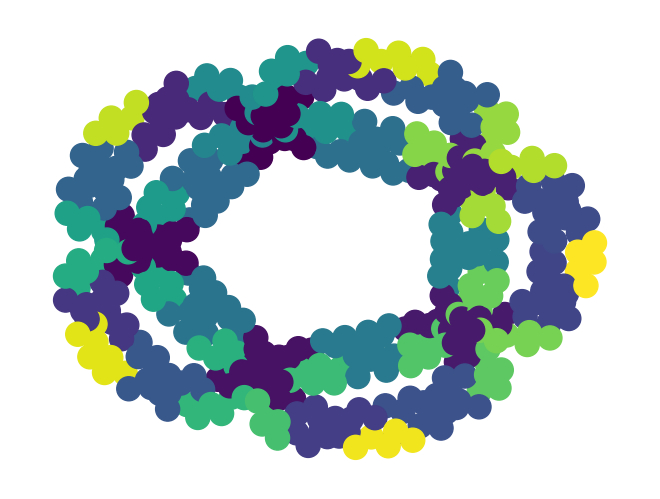

In [13]:
fn.draw_box_covering(G, nodes_to_boxes)

To see what the network looks after box renormalisation with supernodes the same colour as their respective boxes above we use `renormalise_graph`.

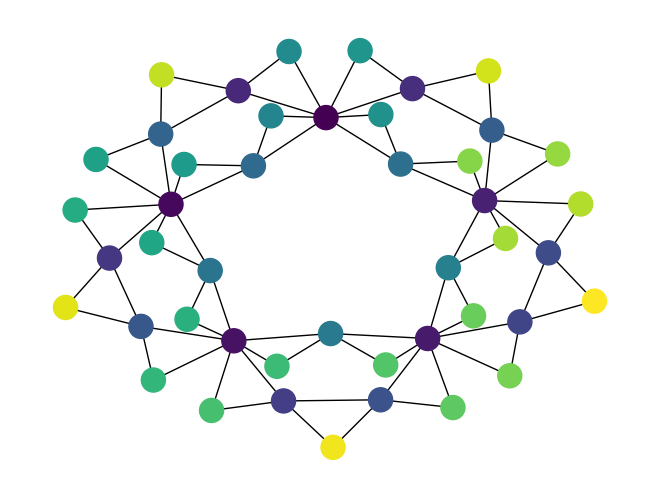

In [15]:
fn.renormalise_graph(G, boxes, nodes_to_boxes, draw=True)

We can also apply box coverings and renormalisation iteratively until only one supernode is left in the network, using `fn.renormalise_iteratively`.

In [7]:
help(fn.renormalise_iteratively)

Help on function renormalise_iteratively in module fractalnetworks.boxrenormalisation:

renormalise_iteratively(filepath, lB, method=<function accelerated_MEMB at 0x000002480DF53920>, draw=False)
    Iteratively finds the box covering and then renormalises the network until only one node is left.
    
    Args:
        filepath (str): The filepath to the network file.
        lB (int): The diameter of the boxes for the box covering.
        method (func) (opt): The MEMB method used to find the box covering. Default is degree_based_MEMB.
        draw (Bool) (opt): If True then display the networks. Default is False.
    
    Returns:
        None



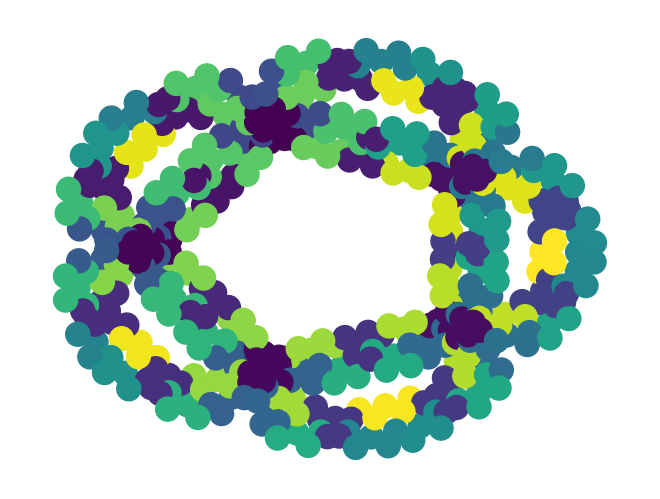

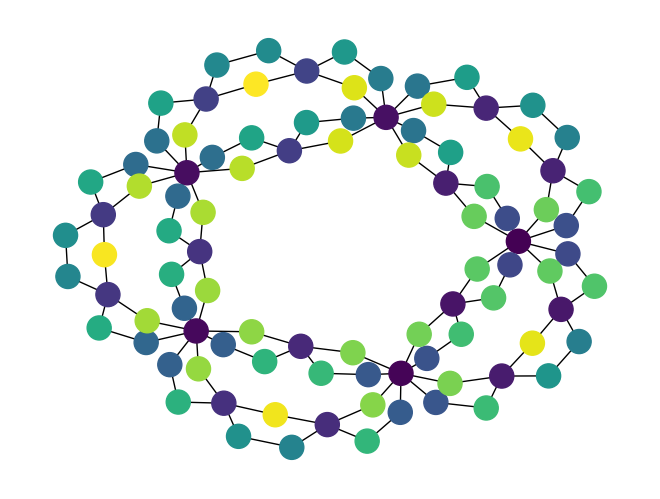

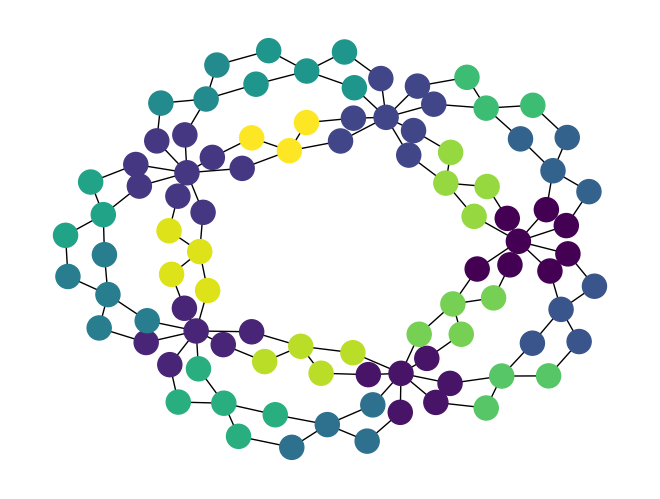

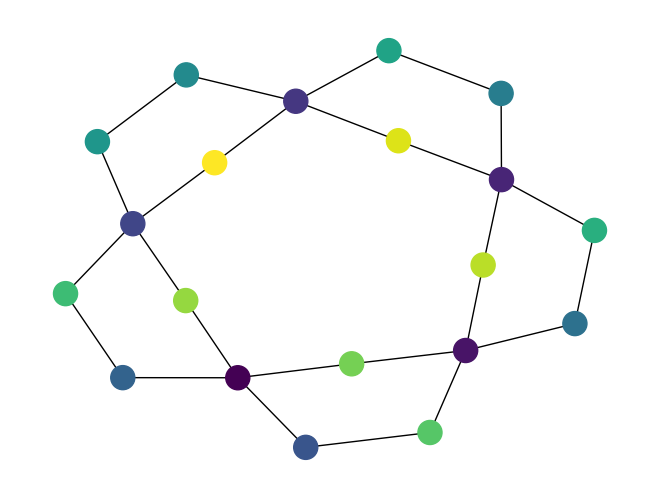

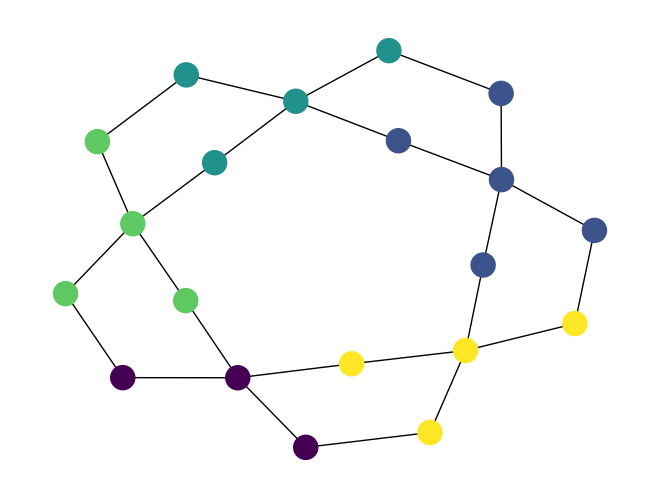

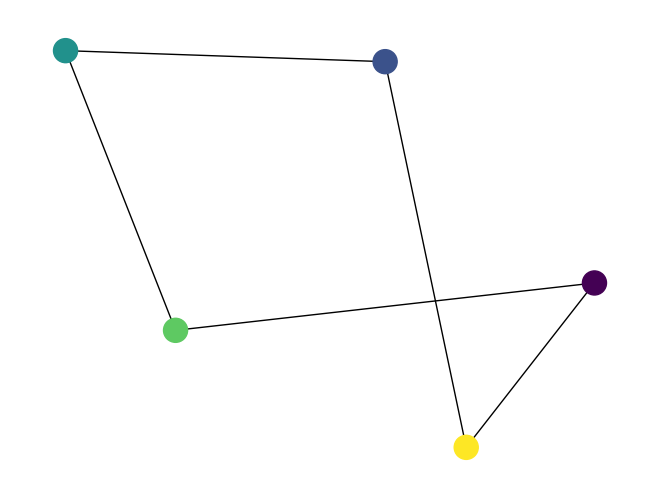

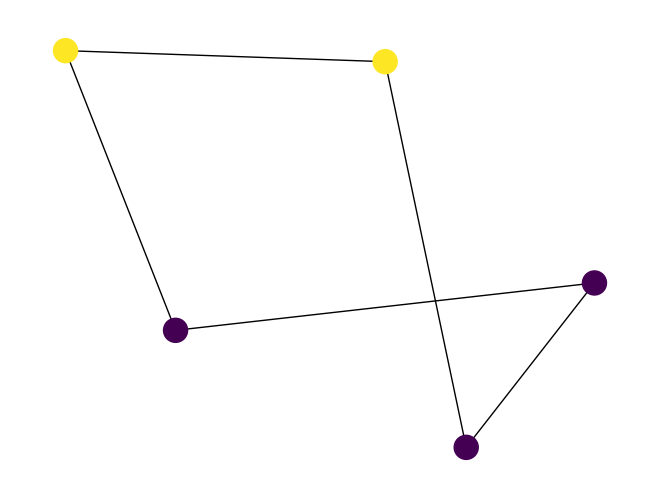

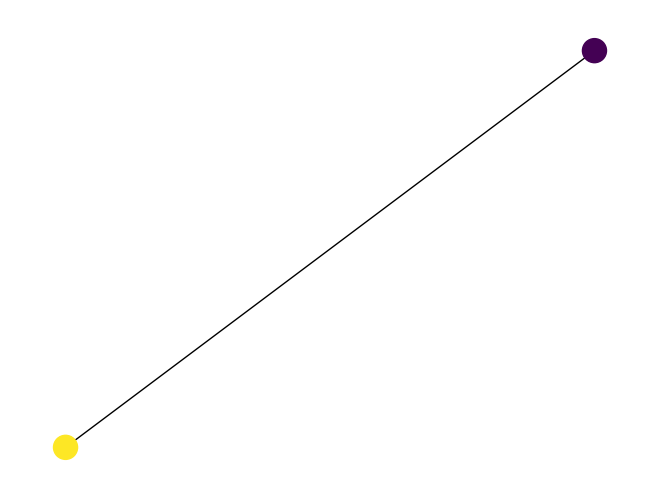

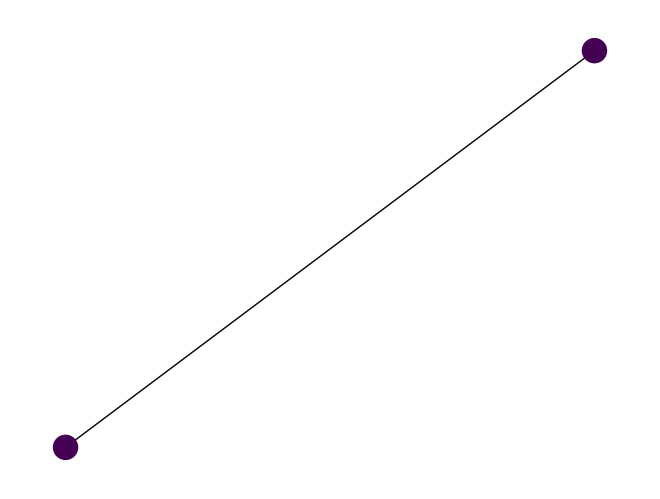

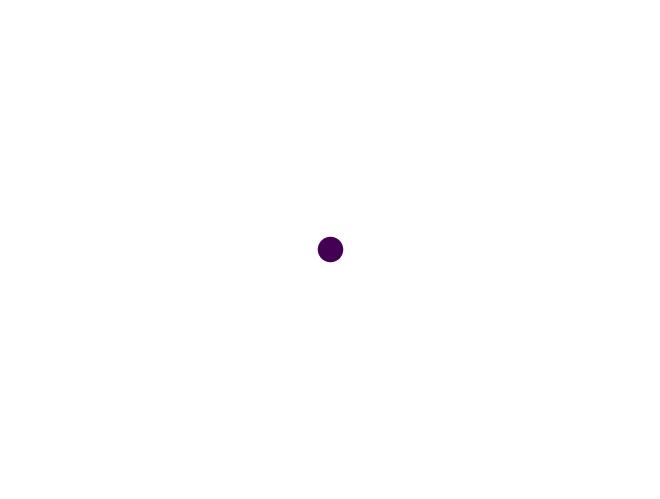

In [5]:
fn.renormalise_iteratively("tutorial/2_3_flower-generation4.gml", 3, method=fn.accelerated_MEMB, draw=True)

<h1> References

[1] C. Song, L. K. Gallos, S. Havlin, and H. A. Makse, “How to calculate the fractal dimension of a complex
network: The box covering algorithm,” Journal of Statistical Mechanics, 2007.

[2] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis*, 2024.

[3] D. Matula and B. Leland, “Smallest-Last Ordering and Clustering and Graph Coloring Algorithms.” Journal of the ACM, 1983.